First of all, I want to leave some comments on this dataset. It contains 34 columns with around 150.000 values, which is pretty comprehensive. However, the dataset needs more cleansing to become usable for me because it has missing values, outliers, and unnecessary features. Based on my understanding, I will carefully consider and conduct the cleasing with clear explanations for you.

In [1]:
# Import InteractiveShell to see all of the outcomes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [3]:
# Ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
loandef = pd.read_csv('/kaggle/input/loan-default-dataset/Loan_Default.csv')

**I. DATA OVERVIEW AND PRELIMINARY CLEANSING**

It's always important to take a look at the data before jumping into the analyzing process. Also, as I mentioned before, I will have something to do to clean this data before I can really use it.

In [5]:
# Drop all of the columns that I'm not going to use
loandef = loandef[['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'credit_type', 'Credit_Score', 'age', 'Region', 'Status']]

In [6]:
# Check the first and last 5 rows of the dataset
loandef.head()
print( )
loandef.tail( )

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,credit_type,Credit_Score,age,Region,Status
0,cf,Sex Not Available,nopre,type1,p1,l1,nob/c,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,EXP,758,25-34,south,1
1,cf,Male,nopre,type2,p1,l1,b/c,206500,NaN,NaN,NaN,360.0,NaN,4980.0,EQUI,552,55-64,North,1
2,cf,Male,pre,type1,p1,l1,nob/c,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,EXP,834,35-44,south,0
3,cf,Male,nopre,type1,p4,l1,nob/c,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,EXP,587,45-54,North,0
4,cf,Joint,pre,type1,p1,l1,nob/c,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,CRIF,602,25-34,North,0


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,credit_type,Credit_Score,age,Region,Status
148665,cf,Sex Not Available,nopre,type1,p3,l1,nob/c,436500,3.125,0.2571,9960.00,180.0,608000.0,7860.0,CIB,659,55-64,south,0
148666,cf,Male,nopre,type1,p1,l1,nob/c,586500,5.190,0.8544,0.00,360.0,788000.0,7140.0,CIB,569,25-34,south,0
148667,cf,Male,nopre,type1,p4,l1,nob/c,446500,3.125,0.0816,1226.64,180.0,728000.0,6900.0,CIB,702,45-54,North,0
148668,cf,Female,nopre,type1,p4,l1,nob/c,196500,3.500,0.5824,4323.33,180.0,278000.0,7140.0,EXP,737,55-64,North,0
148669,cf,Female,nopre,type1,p3,l1,nob/c,406500,4.375,1.3871,6000.00,240.0,558000.0,7260.0,CIB,830,45-54,North,0


In [7]:
# Check and remove duplicated values
loandef.duplicated().sum() #check duplicated values
print( )
loandef.drop_duplicates(inplace=True)
loandef.duplicated().sum() #check again after removing the duplicated

1

0

In [8]:
loandef.describe()
print( )
print(f'The dataset has {len(loandef)} rows')

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,Status
count,1.486690e+05,112231.000000,112031.000000,109028.000000,148628.000000,1.335710e+05,139519.000000,148669.000000,148669.000000
mean,3.311184e+05,4.045476,0.441656,3224.996127,335.136414,4.978953e+05,6957.366380,699.789284,0.246440
std,1.839098e+05,0.561391,0.513043,3251.121510,58.409244,3.599360e+05,6496.601541,115.876225,0.430939
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,0.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,0.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,0.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,1.000000



The dataset has 148669 rows


In [9]:
# Check the data types and missing values in each column
loandef.info()
print( )
loandef.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 148669 entries, 0 to 148669
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_limit              145325 non-null  object 
 1   Gender                  148669 non-null  object 
 2   approv_in_adv           147761 non-null  object 
 3   loan_type               148669 non-null  object 
 4   loan_purpose            148535 non-null  object 
 5   Credit_Worthiness       148669 non-null  object 
 6   business_or_commercial  148669 non-null  object 
 7   loan_amount             148669 non-null  int64  
 8   rate_of_interest        112231 non-null  float64
 9   Interest_rate_spread    112031 non-null  float64
 10  Upfront_charges         109028 non-null  float64
 11  term                    148628 non-null  float64
 12  property_value          133571 non-null  float64
 13  income                  139519 non-null  float64
 14  credit_type             1

loan_limit                 3344
Gender                        0
approv_in_adv               908
loan_type                     0
loan_purpose                134
Credit_Worthiness             0
business_or_commercial        0
loan_amount                   0
rate_of_interest          36438
Interest_rate_spread      36638
Upfront_charges           39641
term                         41
property_value            15098
income                     9150
credit_type                   0
Credit_Score                  0
age                         200
Region                        0
Status                        0
dtype: int64

array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'rate_of_interest'}>,
        <Axes: title={'center': 'Interest_rate_spread'}>],
       [<Axes: title={'center': 'Upfront_charges'}>,
        <Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'property_value'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'Credit_Score'}>,
        <Axes: title={'center': 'Status'}>]], dtype=object)

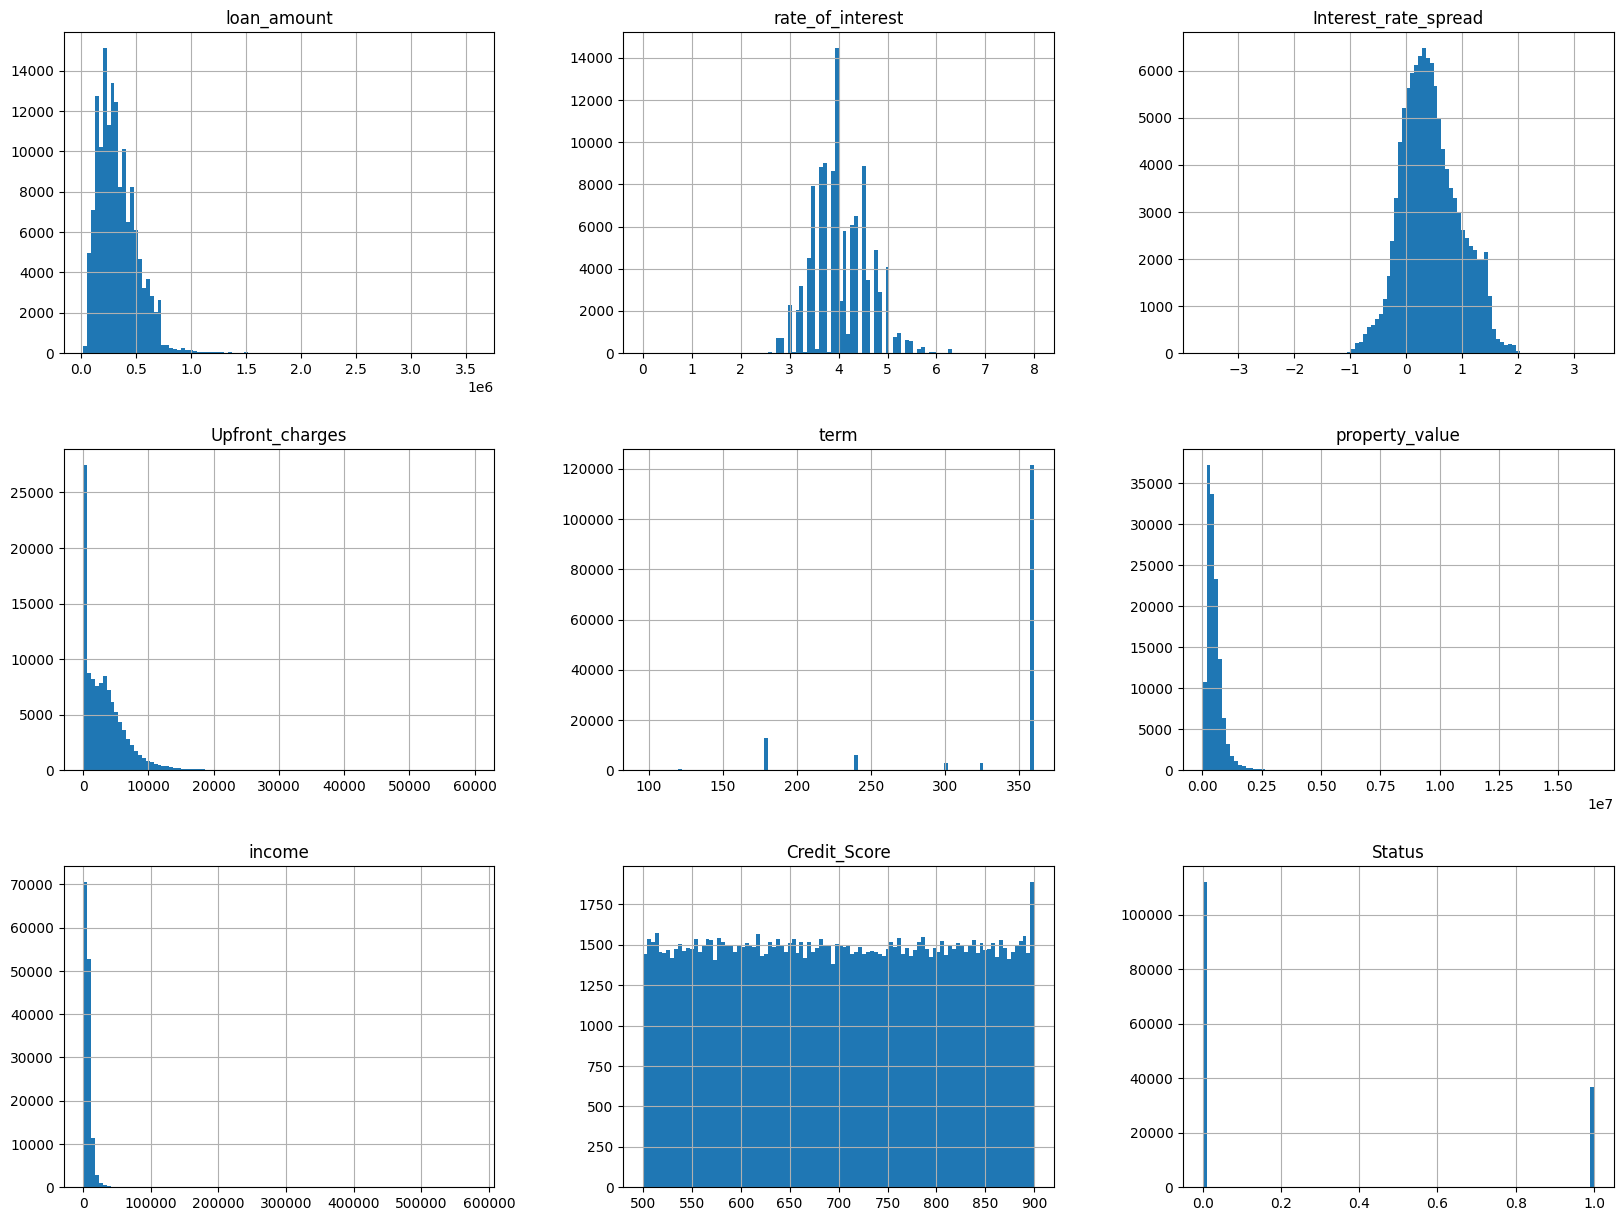

In [10]:
# Check the data distribution by graphing histograms
loandef.hist(
    bins = 100,
    figsize = (20, 15)
)

In [11]:
# Among the columns with missing values, only 'rate_of_interest' and 'Interest_rate_spread' have the bell-shaped distribution
# Replace the missing values in 'rate_of_interest' and 'Interest_rate_spread' columns with their mean values
mean_interest_rate = loandef['rate_of_interest'].mean()
mean_rate_spread = loandef['Interest_rate_spread'].mean()
loandef['rate_of_interest'].fillna(mean_interest_rate, inplace=True)
loandef['Interest_rate_spread'].fillna(mean_rate_spread, inplace=True)

In [12]:
# Check the missing values again
loandef.isnull().sum()
print( )
len(loandef)

loan_limit                 3344
Gender                        0
approv_in_adv               908
loan_type                     0
loan_purpose                134
Credit_Worthiness             0
business_or_commercial        0
loan_amount                   0
rate_of_interest              0
Interest_rate_spread          0
Upfront_charges           39641
term                         41
property_value            15098
income                     9150
credit_type                   0
Credit_Score                  0
age                         200
Region                        0
Status                        0
dtype: int64

148669

**II. CONSTRUCT DATA PIPELINES AND SPLIT TRAIN-TEST SETS**

We will continue with the cleansing with a more advance process. After the data is clean, we will prepare the train-test sets to train the models later

In [13]:
# Provide a list of numerical features and a list of categorical features
num_features = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score']
cat_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'business_or_commercial', 'credit_type', 'age', 'Region']

In [14]:
# Create a pipeline to process numerical features
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # impute missing values with the median
    ('std_scaler', StandardScaler()) # standardize a feature
  ])

# Create a pipeline to process categorical features
cat_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with the mode
    ('encoder', OneHotEncoder(handle_unknown='ignore'))   # One-hot encode categorical features
])

# Create a full pipeline to process both numerical and categorical features
full_pipline = ColumnTransformer([
  ('num', num_pipline, num_features), # process numerical features using the numerical feature pipline created
  ('cat', cat_pipline, cat_features) # process categorical features using one-hot encoder
  ])

In [15]:
# Identify the features and target
X = loandef.drop('Status', axis=1)  #features
y = loandef['Status']  #target
y = y.values.reshape(-1, 1)

In [16]:
# Recheck the shape of features an target
print(X.shape)
print(y.shape)

(148669, 18)
(148669, 1)


In [17]:
# Split the train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, # features
    y, # target
    test_size = 0.2, # 20% data to be included in the test set
    random_state = 42 # specify random seed for results replication
  )

In [18]:
# Fit and transform the data using the full pipeline
X_train = full_pipline.fit_transform(X_train)

X_test = full_pipline.transform(X_test)

**III. Hyperparameter Tuning**

I want to tune the hyperparameters for 4 models: Logistic Regression, K-nearest neighbors, Decision Tree, and Random Forest. At first, I tried using RandomSearch CV but my laptop turned out to be unable to perform it. Therefore, I changed to use cross-validation and only applied it to 10% of my train set (because the data was too heavy)

In [19]:
# Create smaller train set
X_train_small, _, y_train_small, _ = train_test_split(
    X_train,
    y_train,
    test_size=0.9,
    random_state=42
)

> Logistic Regression

In [20]:
# Find the best hyperparameter using cross-validation
C_values = [0.1, 1, 10]  # Small range for faster testing
log_reg_auc_scores = []

# Loop through different C values
for C in C_values:
    log_reg = LogisticRegression(C=C, max_iter=500, solver='saga', random_state=42, n_jobs=-1)
    auc_scores = cross_val_score(log_reg, X_train_small, y_train_small, cv=3, scoring='roc_auc', n_jobs=-1)
    log_reg_auc_scores.append(auc_scores.mean())  # Store average AUC

# Find the best hyperparameter
best_C = C_values[np.argmax(log_reg_auc_scores)]
print("Logistic Regression - Best C:", best_C)
print("Average AUC Scores:", log_reg_auc_scores)

Logistic Regression - Best C: 10
Average AUC Scores: [0.7929380044364146, 0.7932084892481601, 0.7932774976027849]


> K-nearest neighbors

In [21]:
# Find the best hyperparameter using cross-validation
neighbor_values = [3, 5, 7]  # Test limited neighbors for efficiency
knn_auc_scores = []

# Loop through different n_neighbors
for n in neighbor_values:
    knn_model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    auc_scores = cross_val_score(knn_model, X_train_small, y_train_small, cv=3, scoring='roc_auc', n_jobs=-1)
    knn_auc_scores.append(auc_scores.mean())

# Find the best hyperparameter
best_n_neighbors = neighbor_values[np.argmax(knn_auc_scores)]
print("KNN - Best n_neighbors:", best_n_neighbors)
print("Average AUC Scores:", knn_auc_scores)

KNN - Best n_neighbors: 7
Average AUC Scores: [0.9278876970409305, 0.949439632204126, 0.9582228329050925]


> Decision Tree

In [22]:
# Find the best hyperparameter using cross-validation
depth_values = [3, 5, 7]  # Test limited max_depths
dec_tree_scores = []

# Loop through different max_depth values
for depth in depth_values:
    dec_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    auc_scores = cross_val_score(dec_tree, X_train_small, y_train_small, cv=3, scoring='roc_auc', n_jobs=-1)
    dec_tree_scores.append(auc_scores.mean())

# Find the best hyperparameter
best_depth = depth_values[np.argmax(dec_tree_scores)]
print("Decision Tree - Best max_depth:", best_depth)
print("Average AUC Scores:", dec_tree_scores)

Decision Tree - Best max_depth: 3
Average AUC Scores: [0.9999443516972732, 0.9999443516972732, 0.9999443516972732]


Random Forest

In [23]:
# Find the best hyperparameter using cross-validation
estimator_values = [50, 100]  # Test small number of trees for speed
forest_auc_scores = []

# Loop through different n_estimators
for n_estimators in estimator_values:
    forest_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    auc_scores = cross_val_score(forest_clf, X_train_small, y_train_small, cv=3, scoring='roc_auc', n_jobs=-1)
    forest_auc_scores.append(auc_scores.mean())

# Find the best hyperparameter
best_n_estimators = estimator_values[np.argmax(forest_auc_scores)]
print("Random Forest - Best n_estimators:", best_n_estimators)
print("Average AUC Scores:", forest_auc_scores)

Random Forest - Best n_estimators: 50
Average AUC Scores: [1.0, 1.0]


**IV. TRAIN MODELS USING TUNED HYPERPARAMETERS**

> Logistic Regression

In [24]:
# Use the best C value found during tuning
best_log_reg = LogisticRegression(C=best_C, max_iter=500, solver='saga', random_state=42, n_jobs=-1)
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=500, n_jobs=-1, random_state=42,
                   solver='saga')

In [25]:
log_reg_pred_prob = best_log_reg.predict_proba(X_test)[:, 1]
print("Logistic Regression AUC:", roc_auc_score(y_test, log_reg_pred_prob))

Logistic Regression AUC: 0.7994815109271716


> K-nearest Neighbors

In [26]:
# Use the best n_neighbors value found during tuning
best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, n_jobs=-1)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [27]:
knn_pred_prob = best_knn.predict_proba(X_test)[:, 1]
print("KNN AUC:", roc_auc_score(y_test, knn_pred_prob))

KNN AUC: 0.9776570623480366


> Decision Tree

In [28]:
# Use the best max_depth value found during tuning
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [29]:
tree_pred_prob = best_tree.predict_proba(X_test)[:, 1]
print("Decision Tree AUC:", roc_auc_score(y_test, tree_pred_prob))

Decision Tree AUC: 1.0


> Random Forest

In [30]:
# Use the best n_estimators value found during tuning
best_forest = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42, n_jobs=-1)
best_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [31]:
forest_pred_prob = best_forest.predict_proba(X_test)[:, 1]
print("Random Forest AUC:", roc_auc_score(y_test, forest_pred_prob))

Random Forest AUC: 1.0


**V. EVALUATE AND COMPARE MODELS**

In [32]:
def evaluate_model(model, X_test, y_test, model_name):
    # Predict class and probabilities
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred)

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.7)
    plt.title(f'ROC Curve - {model_name}', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(alpha=0.7)
    plt.show()

    # Print Evaluation Metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print(f"ROC-AUC Score: {roc_auc:.2f}")
    print("-" * 50)

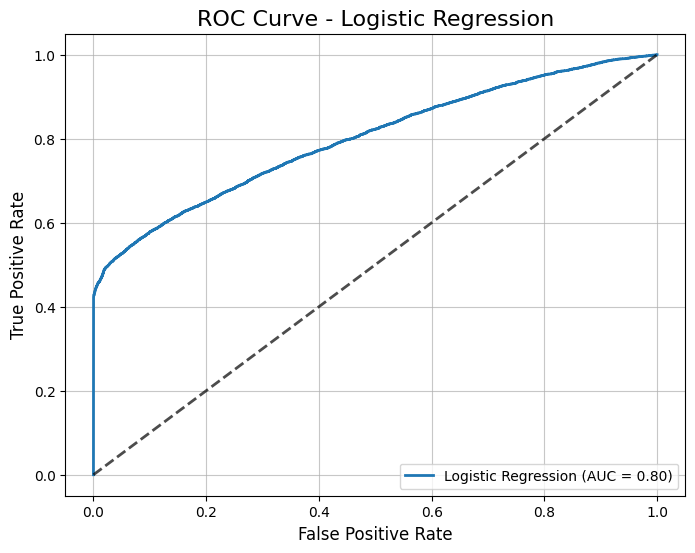

Model: Logistic Regression
Accuracy: 0.86
Confusion Matrix:
[[22438    20]
 [ 4164  3112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     22458
           1       0.99      0.43      0.60      7276

    accuracy                           0.86     29734
   macro avg       0.92      0.71      0.76     29734
weighted avg       0.88      0.86      0.84     29734

ROC-AUC Score: 0.80
--------------------------------------------------


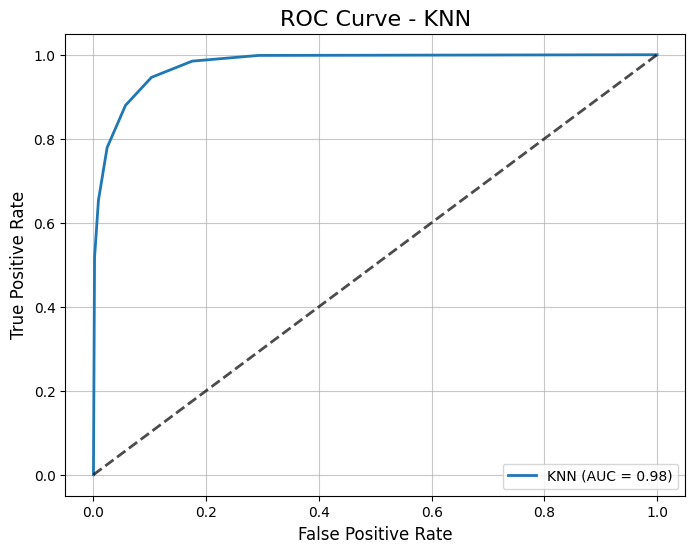

Model: KNN
Accuracy: 0.93
Confusion Matrix:
[[21181  1277]
 [  877  6399]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     22458
           1       0.83      0.88      0.86      7276

    accuracy                           0.93     29734
   macro avg       0.90      0.91      0.90     29734
weighted avg       0.93      0.93      0.93     29734

ROC-AUC Score: 0.98
--------------------------------------------------


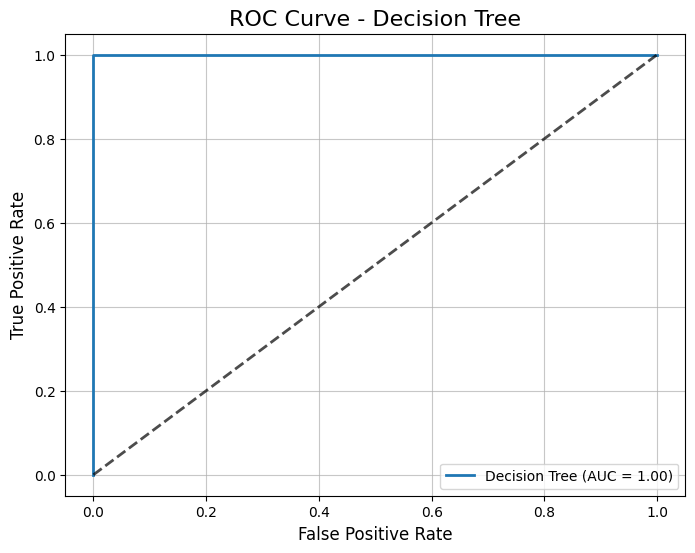

Model: Decision Tree
Accuracy: 1.00
Confusion Matrix:
[[22458     0]
 [    0  7276]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22458
           1       1.00      1.00      1.00      7276

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC Score: 1.00
--------------------------------------------------


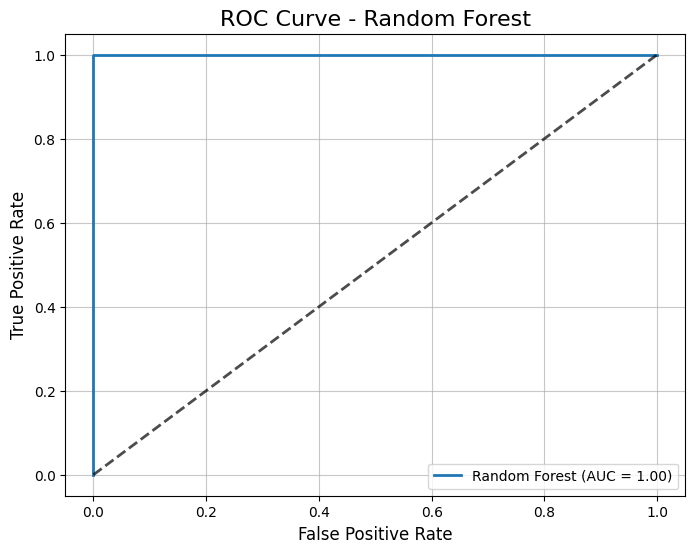

Model: Random Forest
Accuracy: 1.00
Confusion Matrix:
[[22458     0]
 [    0  7276]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22458
           1       1.00      1.00      1.00      7276

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734

ROC-AUC Score: 1.00
--------------------------------------------------


In [33]:
# Logistic Regression
evaluate_model(best_log_reg, X_test, y_test, "Logistic Regression")

# KNN
evaluate_model(best_knn, X_test, y_test, "KNN")

# Decision Tree
evaluate_model(best_tree, X_test, y_test, "Decision Tree")

# Random Forest
evaluate_model(best_forest, X_test, y_test, "Random Forest")

In [34]:
comparison_data = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.86, 0.93, 1.00, 1.00],
    'ROC-AUC': [0.80, 0.98, 1.00, 1.00],
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

                 Model  Accuracy  ROC-AUC
0  Logistic Regression      0.86     0.80
1                  KNN      0.93     0.98
2        Decision Tree      1.00     1.00
3        Random Forest      1.00     1.00


There are two models, Decision Tree and Random Forest, that had neatly 100% accuracy (only 1 False Positive). However, I guess that they might be overfitting because of my cleansing process. I don't know how to fix them, so I will just ignore them. KNN is the model with the higher accuracy and ROC-AUC score, so I think this is my final result. 